<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследуем-отдельные-параметры" data-toc-modified-id="Исследуем-отдельные-параметры-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследуем отдельные параметры</a></span></li><li><span><a href="#Исследуем-как-быстро-продавались-квартиры" data-toc-modified-id="Исследуем-как-быстро-продавались-квартиры-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследуем как быстро продавались квартиры</a></span></li><li><span><a href="#Исследуем-влияние-разных-факторов-на-общую-стоимость-объекта" data-toc-modified-id="Исследуем-влияние-разных-факторов-на-общую-стоимость-объекта-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследуем влияние разных факторов на общую стоимость объекта</a></span></li><li><span><a href="#Исследуем-цену-одного-кв.метра-в-10-населенных-пунктах-с-наибольшим-количеством-объявлений" data-toc-modified-id="Исследуем-цену-одного-кв.метра-в-10-населенных-пунктах-с-наибольшим-количеством-объявлений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Исследуем цену одного кв.метра в 10 населенных пунктах с наибольшим количеством объявлений</a></span></li><li><span><a href="#Исследуем--зависит-ли-цена-квартиры-в-Санкт-Петербурге-от-расстояния-до-центра-города" data-toc-modified-id="Исследуем--зависит-ли-цена-квартиры-в-Санкт-Петербурге-от-расстояния-до-центра-города-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Исследуем  зависит ли цена квартиры в Санкт-Петербурге от расстояния до центра города</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо выявить основные параметры и факторы, влияющие на рыночную цену квартиры.

### Загрузка данных

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [38]:
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


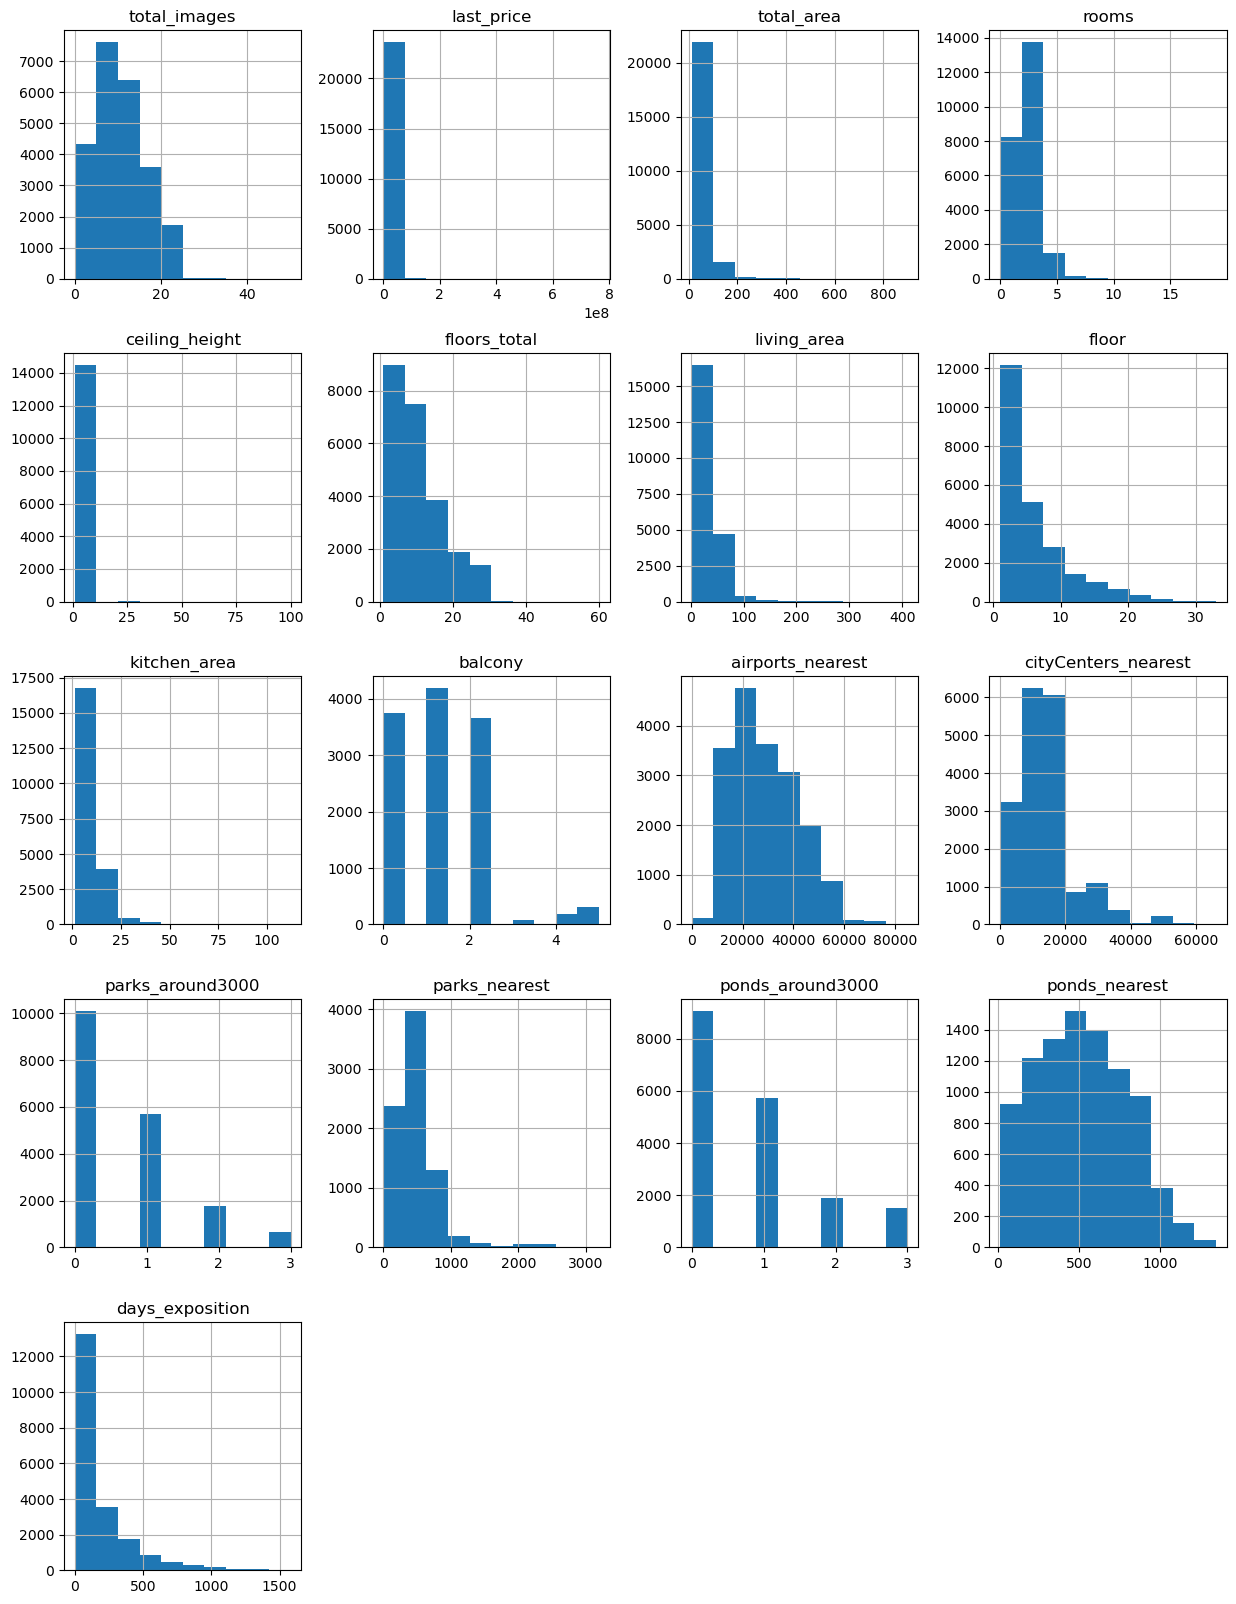

In [39]:
data.hist(figsize=(15,20));

   Мы загрузили данные из csv-файла, посмотрели основную информацию о датафрейме: количество строк и столбцов, типы данных, построили гистограмму для всех числовых столцов. 

Типы данных по определенным столбцам стоит исправить:

floors_total — количество этажей это целочисленное значение, сменим тип данных с float на int;
balcony — количество балконов должно быть целочисленным, сменим тип с float на int;
days_exposition — количество дней, сколько объявление было размещено, сменим тип с float на int.
Пропуски значений в данных являются значимыми, и их нельзя игнорировать:

ceiling_height — для исправления этой ситуации можно использовать медианное значение, чтобы заполнить пропущенные данные.
floors_total — отсутствуют 86 значений об этажности дома, вероятнее всего, эти данные можно пропустить.

living_area — данные о жилой площади являются важными для решения поставленных вопросов. 

is_apartment — много значений в этом столбце отсутствуют. Стоит предположить, что этот параметр был указан только для аппартаментов, а для остальных объявлений либо отмечали обратное, либо, что вероятнее всего, параметр оставляли незаполненным. Так как тип значений в этом столбце bool, пропущенные значения можно заменить на "False".

kitchen_area — размер кухни также не указан в объявлениях. Пропуски позже нужно обработать.

balcony — Можно предположить, что количество балконов не указывалось в тех квартирах, где балконов и вовсе нет. Пропущенные значения можно заменить на значение 0.

locality_name — отсутствуют 49 значений. Точное местоположение неизвестно и эти данные не могут быть использованы для рассчетов, удалим их.

### Предобработка данных

In [40]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [41]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


In [42]:
data['balcony'] = data['balcony'].fillna(0)

Заменили пропуски в столбце 'balcony' на '0'

In [43]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Заменили пропуски в столбце 'is_apartment' на 'False'

In [44]:
data['floors_total'] = data['floors_total'].fillna(0)
#data['days_exposition'] = data['days_exposition'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(value='0')
data['ponds_around3000'] = data['ponds_around3000'].fillna(value='0')

Заменили пропуски в столбцах 'floor', 'days_exposition', 'parks_around3000', 'ponds_around3000' на 0.

In [45]:
data.duplicated().sum()

0

Проверили, есть ли явные дубликаты

In [46]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

Исправили название столбца 'cityCenters_nearest'

In [47]:
display(data['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [48]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('деревня Федоровское', 'городской поселок Федоровское')
data['locality_name'] = data['locality_name'].replace('Кингисеп', 'поселок Кингисеппский')
data['locality_name'] = data['locality_name'].replace('Никольское', 'село Никольское')
data['locality_name'] = data['locality_name'].replace('городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('село Павлово', 'городской поселок Павлово')
data['locality_name'] = data['locality_name'].replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace('поселок станции Громово', 'поселок Громово')
data['locality_name'] = data['locality_name'].replace('городской поселок Назия', 'поселок городского типа Назия')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
data['locality_name'] = data['locality_name'].replace('городской поселок Советский', 'поселок городского типа Советский')
data['locality_name'] = data['locality_name'].replace('Любань', 'поселок Любань')
data['locality_name'] = data['locality_name'].replace('деревня Зимитицы', 'поселок Зимитицы')
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('городской поселок Мга', 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].replace('городской поселок Павлово', 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace('деревня Калитино', 'поселок Калитино')
data['locality_name'] = data['locality_name'].replace('деревня Щеглово', 'поселок Щеглово')
data['locality_name'] = data['locality_name'].replace('деревня Рабитицы', 'поселок Рабитицы')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Рахья', 'поселок городского типа Рахья')
data['locality_name'] = data['locality_name'].replace('деревня Гарболово', 'поселок Гарболово')
data['locality_name'] = data['locality_name'].replace('коттеджный поселок Лесное', 'поселок Лесное')
data['locality_name'] = data['locality_name'].replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Приладожский', 'поселок городского типа Приладожский')


Заменили неявные дубликаты в названиях населенных пунктов

1.0 100.0 2.65
39


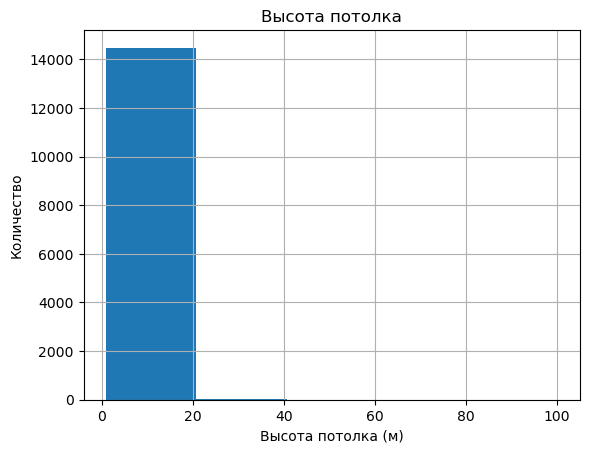

In [49]:
data['ceiling_height'].plot(kind='hist', bins=5, title='Высота потолка', grid=True)
plt.ylabel('Количество')
plt.xlabel('Высота потолка (м)')
print(data['ceiling_height'].min(), data['ceiling_height'].max(), data['ceiling_height'].median())
print(len(data.query('ceiling_height<=2 or ceiling_height>=10')))
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


Заполнили пропуски в столбце 'ceiling_height' медианными значениями.

0.0 60.0


Text(0.5, 0, 'Этажи')

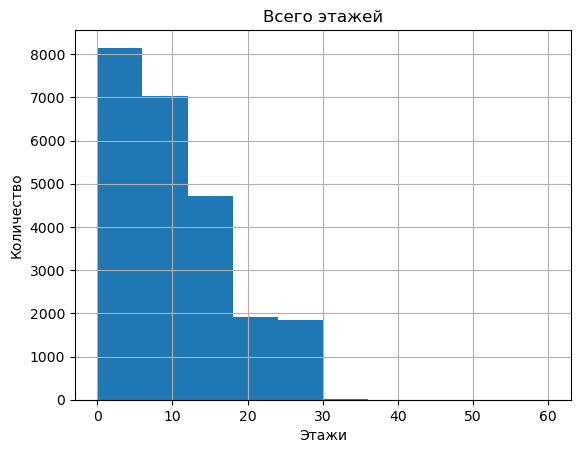

In [50]:
print(data['floors_total'].min(), data['floors_total'].max())

data['floors_total'].plot(kind='hist', bins=10, title='Всего этажей', grid=True)
plt.ylabel('Количество')
plt.xlabel('Этажи')

In [51]:
data = data.loc[data['locality_name'].isna()!=True]

Удалили пропуски в столбце 'locality_name'

In [52]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [53]:
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [54]:
avr_living_area = (data['living_area']/data['total_area']).median() #какую часть в среднем составляет жилая площадь от общей

In [55]:
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * avr_living_area

Заполнили пропуски в столбце 'living_area' медианным значением части от общей площади

In [56]:
avr_kitchen_area = (data['kitchen_area']/data['total_area']).median() #какую часть в среднем составляет кухня от общей площади

In [57]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area'] * avr_kitchen_area

Заполнили пропуски в столбце 'kitchen_area' медианным значением части от общей площади

Посмотрели количество пропущенных значений для каждого столбца. 

В столбце 'balcony' заменили пропуски Nan на 0, т.к. не указанное количество балконов говорит скорее всего о том, что их нет. 

Можно предположить, что в столбце 'is_apartment' "нет данных" там, где ответ - "0", т.е. это не апартаменты. Причиной может быть то, что люди особо не знают разницы между апартаментами и квартирами. Владельцы апартаментов точно в курсе, что у них апартаменты, поэтому по ним данные оказались заполненными. Заменим пропущенные значения на 'False'.

Пропуски в столбце 'ceiling_height' заполнили медианными значениями, т.к. количество выбросов (высота потолков меньше 2 м и больше 10 м мало). Высоту потолков возможно не указали, т.к. считали ее стандартной величиной.

Т.к. пропусков в столбце 'locality_name' совсем мало, можно удалить эти строки.

Расстояние до центра, аэропорта, парка, водоема - выгружены автоматически из геосервисов. Возможно произошла ошибка и много данных не выгрузилось. Нужно запросить эту информацию еще раз.

Количество пропусков в столбце 'parks_around3000' и 'ponds_around3000' довольно велико, предположим, что если в строке ничего не указано, то значит и парков рядом нет, заменим такие значения на 0.

В столбце 'locality_name' увидели, что некоторые населенные пункты повторяются, названия привели к одинаковому виду(заменили "ё" на "е", "поселок Мурино" на "Мурино" и т.п.).

В столбце 'first_day_exposition' поменяли тип на "Дата", а 'balcony' на 'int', т.к. число балконов - это целое число. 'ponds_around3000' и 'parks_around3000' - заменили на 'int'

Пропуски в столбце 'floors_total' не заполняем, т.к. нет информации об этажности дома. Заменим пропуски на "0" и поменяем тип на 'int'. Можно ввести категорию высотности дома (малоэтажный, средний, высокий, высотный). Также заменим пропуски в столбце 'days_exposition' на "0" и тип на 'int'.

Пропуски в столбцах возможно появились по причине того, что при заполнении поля были не обязательные. А также те данные, что были загружены из автоматических сервисов, возможно некорректно перенеслись.

In [58]:
data['price_one_metr'] = (data['last_price'] / data['total_area']).round(2)
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [59]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floors_total'] == 0:
        return '---'                    #где не указан этаж, в категории будет стоять "---"
    else:
        return 'другой'

row_values = [5, 10]    
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns)
data['categorize_floor'] = data.apply(categorize_floor, axis=1)


In [60]:
data['city_centers_km'] = (data['city_centers_nearest'] / 1000).round()

Мы добавили столцы:
- цена 1 кв.м
- день недели публикации объявления
- месяц публикации объявления
- год публикации объявления
- классификацию этажей
- расстояние до центра города в км

### Исследовательский анализ данных

#### Исследуем отдельные параметры

Text(0.5, 0, 'Общая площадь')

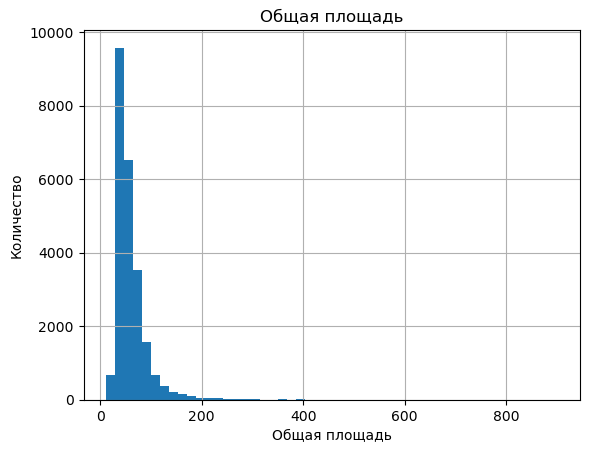

In [61]:
data['total_area'].plot(kind='hist', bins=50, title='Общая площадь', grid=True)
plt.ylabel('Количество')
plt.xlabel('Общая площадь')

<Axes: >

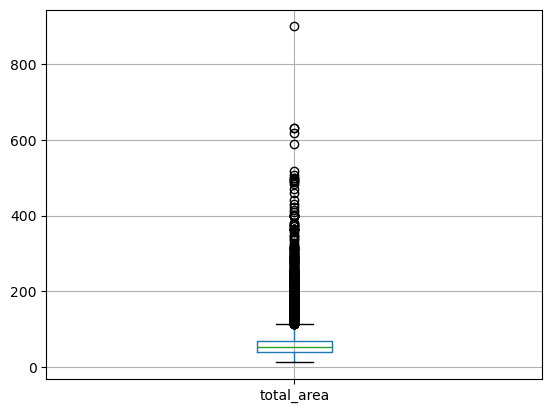

In [62]:
data.boxplot('total_area')

In [63]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

видим, что у нас есть одиночный выброс со значением 900. Основные значения находятся до 500. Рассмотрим их подробнее.

Text(0.5, 0, 'Общая площадь')

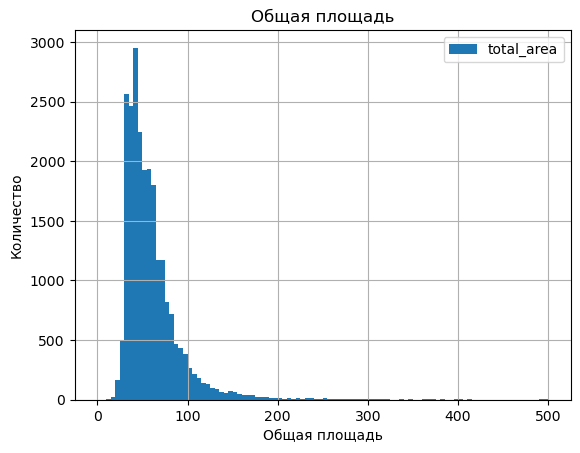

In [64]:
data.plot(kind='hist', y='total_area',  bins=100, range=(0,500), title='Общая площадь', grid=True)
plt.ylabel('Количество')
plt.xlabel('Общая площадь')

т.к. значений 'total_area'>500 не велико, отбросим эти значения

In [65]:
data = data.query('total_area < 500')

Text(0.5, 0, 'Жилая площадь')

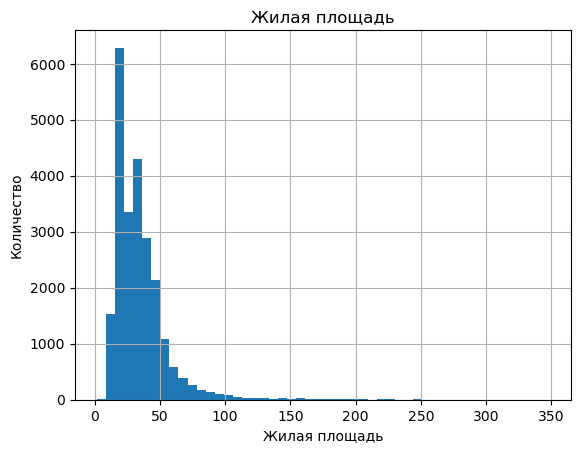

In [66]:
data['living_area'].plot(kind='hist', bins=50, title='Жилая площадь', grid=True)
plt.ylabel('Количество')
plt.xlabel('Жилая площадь')

<Axes: >

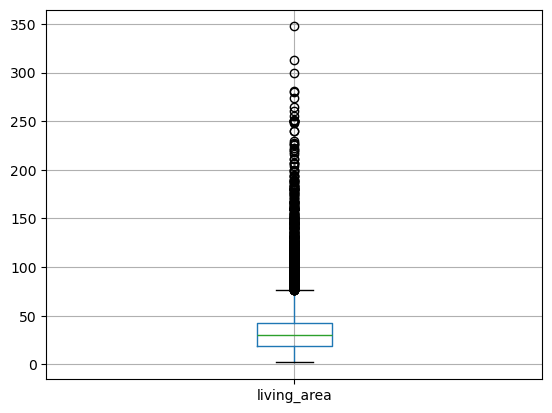

In [67]:
data.boxplot('living_area')

In [68]:
data['living_area'].describe()

count    23641.000000
mean        34.454450
std         21.576750
min          2.000000
25%         19.000000
50%         30.000000
75%         42.021633
max        347.500000
Name: living_area, dtype: float64

In [69]:
print(data.query('(living_area<10) | (living_area>200)'))

       total_images   last_price  total_area first_day_exposition  rooms  \
114               5    4000000.0       21.40           2019-02-07      1   
581              20   65000000.0      365.00           2019-03-18      7   
660               3   49950000.0      483.90           2017-10-04      7   
680              14    7200000.0       43.00           2017-10-31      1   
793              20  135000000.0      310.00           2018-05-22      4   
...             ...          ...         ...                  ...    ...   
22356             6    2050000.0       17.20           2019-01-13      1   
22473             0    3490304.0       33.26           2015-12-22      2   
22494             7   91075000.0      491.00           2017-05-27      5   
23208            12    4800000.0       37.00           2016-02-24      1   
23574            14   64990000.0      139.00           2015-11-24      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
114      

In [70]:
data = data.query('10 <= living_area <= 200')

Text(0.5, 0, 'Жилая площадь')

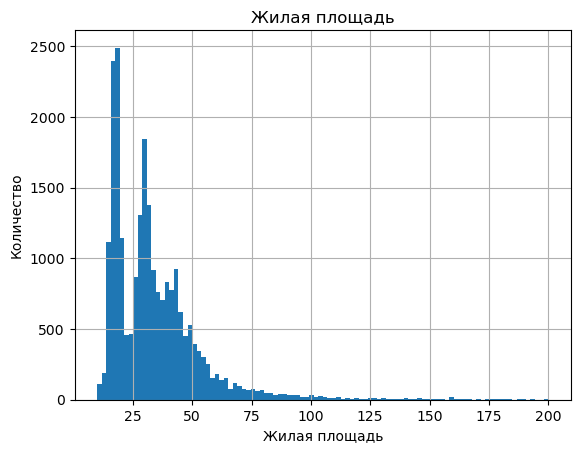

In [71]:
data['living_area'].plot(kind='hist', bins=100, range=(10,200), title='Жилая площадь', grid=True)
plt.ylabel('Количество')
plt.xlabel('Жилая площадь')

Text(0.5, 0, 'Площадь кухни')

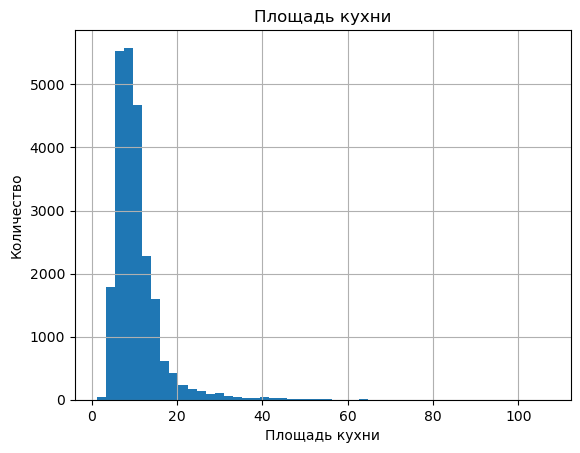

In [72]:
data['kitchen_area'].plot(kind='hist', bins=50, title='Площадь кухни', grid=True)
plt.ylabel('Количество')
plt.xlabel('Площадь кухни')

<Axes: >

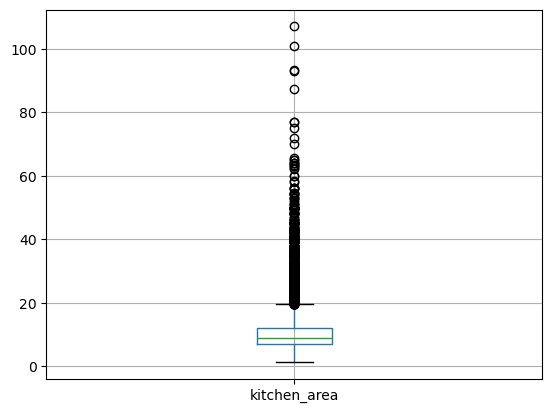

In [73]:
data.boxplot('kitchen_area')

In [74]:
data['kitchen_area'].describe()

count    23576.000000
mean        10.416005
std          5.726177
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [75]:
display(data.query('kitchen_area<2 | kitchen_area>50'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,week_day,month,year,categorize_floor,city_centers_km
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.000000,3,False,...,508.0,3,366.0,62.0,302839.12,4,7,2017,последний,2.0
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.000000,4,False,...,138.0,3,620.0,14.0,439814.81,1,12,2017,другой,0.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.000000,3,False,...,NaN,1,603.0,NaN,500000.00,4,10,2018,последний,5.0
2243,9,130278280.0,304.0,2015-07-24,5,3.11,9,172.629409,7,False,...,164.0,0,NaN,599.0,428546.97,4,7,2015,другой,6.0
2489,9,12500000.0,255.0,2017-04-21,3,2.65,2,153.900000,2,False,...,NaN,3,198.0,102.0,49019.61,4,4,2017,последний,7.0
3561,5,12300000.0,115.0,2017-08-09,3,2.70,20,45.000000,16,False,...,NaN,0,NaN,63.0,106956.52,2,8,2017,другой,14.0
4320,20,19700000.0,146.3,2017-02-10,3,3.40,6,55.800000,6,False,...,548.0,3,883.0,638.0,134654.82,4,2,2017,последний,2.0
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10,95.000000,6,False,...,193.0,3,199.0,1039.0,327586.21,0,11,2015,другой,4.0
6021,19,16830000.0,117.4,2019-04-04,2,2.75,16,33.400000,13,False,...,NaN,0,NaN,NaN,143356.05,3,4,2019,другой,15.0
6193,19,24300000.0,230.0,2016-06-03,4,2.65,3,90.000000,2,False,...,NaN,1,345.0,397.0,105652.17,4,6,2016,другой,15.0


In [76]:
data=data.query('kitchen_area>2 & kitchen_area<50')

Text(0.5, 0, 'Площадь кухни')

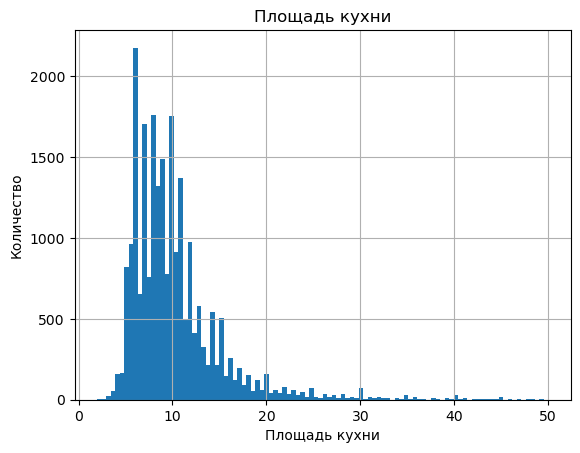

In [77]:
data['kitchen_area'].plot(kind='hist', bins=100, range=(2,50), title='Площадь кухни', grid=True)
plt.ylabel('Количество')
plt.xlabel('Площадь кухни')

Т.к. значений 'total_area'>500, 'living_area'<10 и 'living_area'>200, 'kitchen_area'<2 и 'kitchen_area'>50 мало, то отбросим эти строки для дальнейшего исследования.

Text(0.5, 0, 'Окончательная цена')

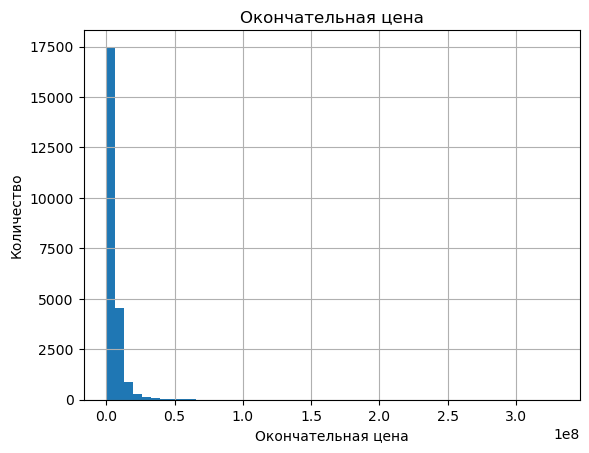

In [78]:
data['last_price'].plot(kind='hist', bins=50, title='Окончательная цена', grid=True)
plt.ylabel('Количество')
plt.xlabel('Окончательная цена')

<Axes: >

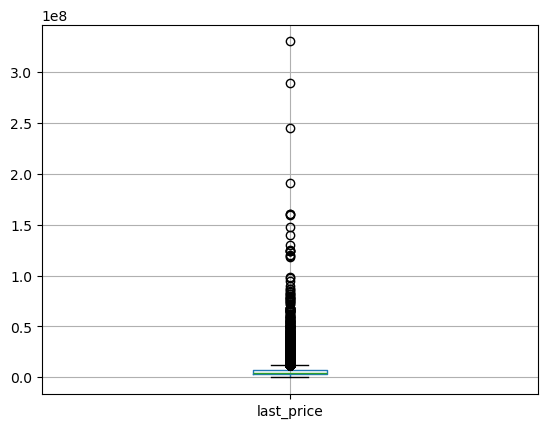

In [79]:
data.boxplot('last_price')

In [80]:
data['last_price'].describe()

count    2.351600e+04
mean     6.244274e+06
std      7.459399e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.727650e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [81]:
display(data.query('last_price>100000000'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,week_day,month,year,categorize_floor,city_centers_km
1188,20,118000000.0,290.6,2018-06-01,6,3.82,6,188.700000,3,False,...,217.0,0,NaN,316.0,406056.43,4,6,2018,другой,6.0
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4,162.000000,3,False,...,464.0,3,339.0,225.0,428571.43,3,7,2018,другой,4.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.000000,5,False,...,519.0,3,285.0,233.0,1736842.11,2,4,2018,другой,1.0
1928,11,125000000.0,224.5,2017-01-24,4,2.65,4,163.500000,3,False,...,NaN,2,497.0,174.0,556792.87,1,1,2017,другой,2.0
2536,16,159984000.0,242.4,2015-08-27,4,3.85,9,131.000000,7,False,...,679.0,1,227.0,501.0,660000.00,3,8,2015,другой,2.0
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4,67.200000,2,False,...,302.0,3,172.0,45.0,995983.94,3,10,2017,другой,2.0
8900,13,190870000.0,268.0,2016-03-25,3,2.65,8,132.000000,7,False,...,NaN,2,198.0,901.0,712201.49,4,3,2016,другой,5.0
12674,16,140000000.0,241.0,2015-07-24,5,3.00,5,136.854236,4,False,...,413.0,3,83.0,399.0,580912.86,4,7,2015,другой,4.0
13864,20,130000000.0,231.0,2015-08-13,6,3.60,6,148.000000,4,False,...,395.0,3,170.0,467.0,562770.56,3,8,2015,другой,1.0
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.800000,4,False,...,400.0,3,140.0,249.0,857542.88,0,4,2017,другой,6.0


Text(0.5, 0, 'Окончательная цена')

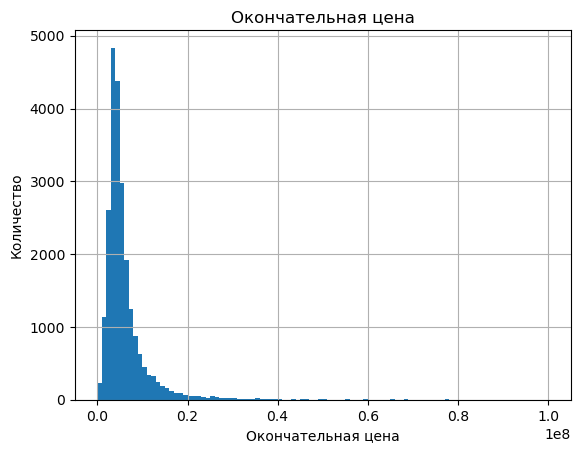

In [82]:
data['last_price'].plot(kind='hist', bins=100, range=(0,100000000), title='Окончательная цена', grid=True)
plt.ylabel('Количество')
plt.xlabel('Окончательная цена')

In [83]:
data = data.query('last_price < 100000000')

Для исследования оставим цену < 100000000.

In [84]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8, 10,  9, 16, 14],
      dtype=int64)

In [85]:
data['rooms'].value_counts()

rooms
1     8006
2     7909
3     5771
4     1152
5      306
0      194
6       97
7       42
8        9
9        6
10       3
11       2
16       1
14       1
Name: count, dtype: int64

Text(0.5, 0, 'Количество комнат')

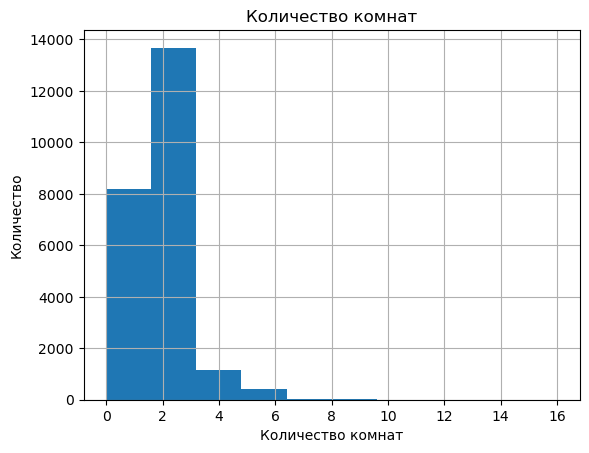

In [86]:
data['rooms'].plot(kind='hist', bins=10, title='Количество комнат', grid=True)
plt.ylabel('Количество')
plt.xlabel('Количество комнат')

In [87]:
data = data.query('rooms<7')

Для исследования оставим количество комнат <= 6.

In [88]:
data_rooms = data.pivot_table(index='rooms', values='total_area', aggfunc='count')

Создадим датафрейм, в котором сохраним количество объявлений для каждого вида комнат

In [89]:
data_rooms['percent'] = (data_rooms['total_area'] / data_rooms['total_area'].sum()) * 100

Создадим новый столбец 'percent' в 'data_rooms', в котором записываем долю каждого вида комнат от всех объявлений

<Axes: title={'center': 'Доля квартир по количеству комнат'}, ylabel='total_area'>

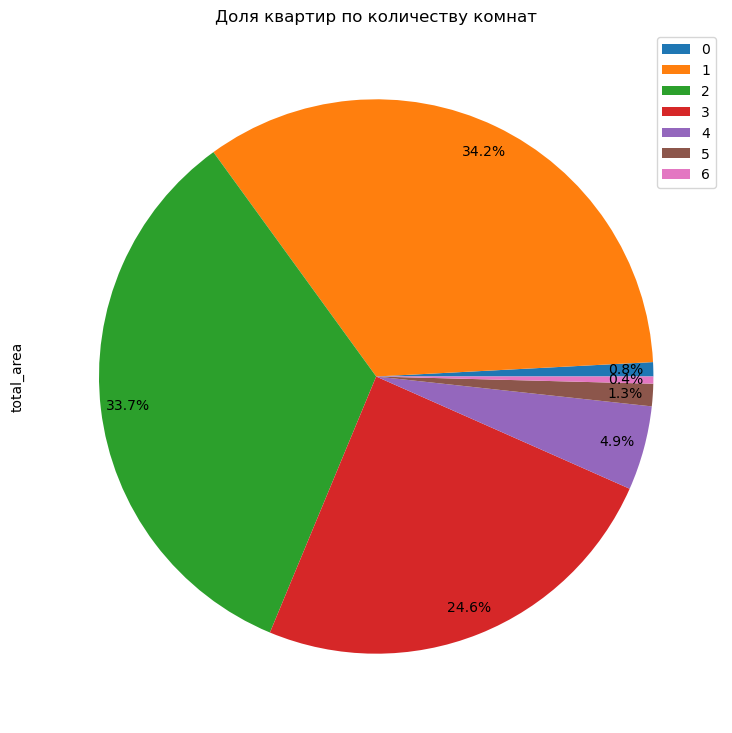

In [90]:
(data_rooms.plot(y='total_area', kind='pie', figsize=(9, 9), 
                 title='Доля квартир по количеству комнат', autopct='%1.1f%%', pctdistance=0.9, labels=None)
)

Рисуем круговую гистограмму

Text(0.5, 0, 'Сколько комнат')

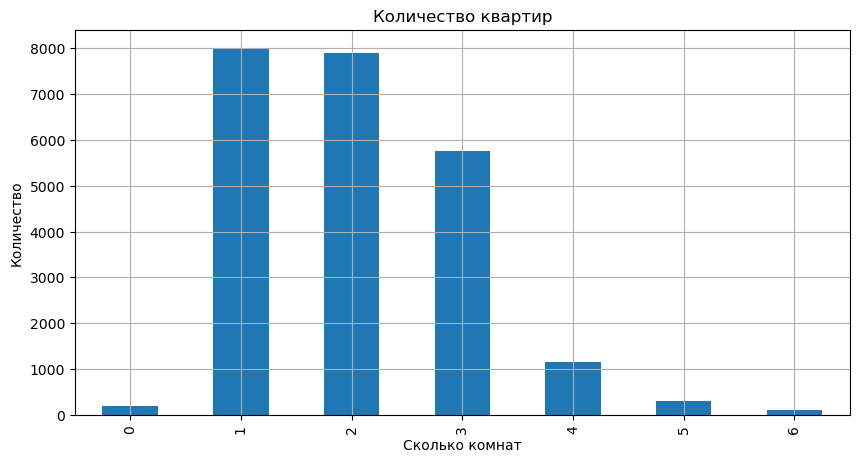

In [91]:
data_rooms.plot(y='total_area', kind='bar', figsize=(10, 5), legend=False, grid=True, title='Количество квартир')
plt.ylabel('Количество')
plt.xlabel('Сколько комнат')

Рисуем столбчатый график

In [92]:
display(data_rooms)

,total_area,percent
rooms,,
0,194,0.827822
1,8006,34.162577
2,7909,33.748667
3,5771,24.625560
4,1152,4.915724
5,306,1.305739
6,97,0.413911


Мы видим, что:
- самые популярные это одно- и двух- комнатные квартиры и занимают 32,6% и 32.87% соответственно
- Квартиры с 0 и 6 комнатами занимают менее 1% от общего количества объявлений
Если выделить 3 самых популярных видов квартир, то в него войдут: одно-, двух- и трехкомнатные квартиры.

Text(0.5, 0, 'Высота потолка')

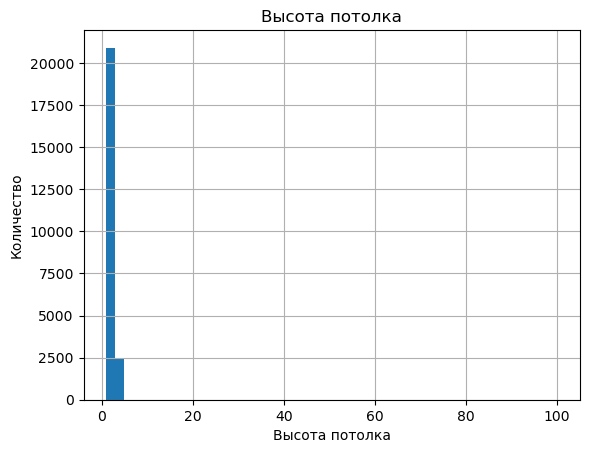

In [93]:
data['ceiling_height'].plot(kind='hist', bins=50, title='Высота потолка', grid=True)
plt.ylabel('Количество')
plt.xlabel('Высота потолка')

<Axes: >

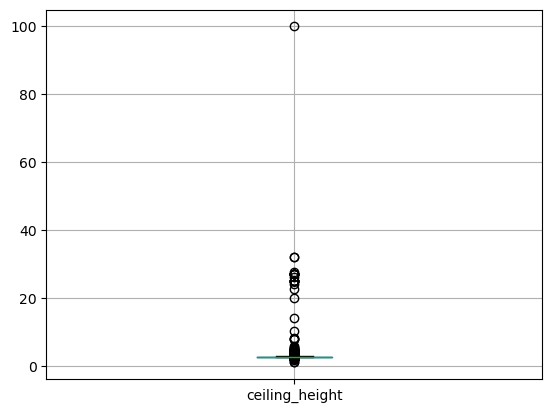

In [94]:
data.boxplot('ceiling_height')

Присутствуют выбросы. Исследуем описание, уникальные значения.

In [95]:
data['ceiling_height'].describe()

count    23435.000000
mean         2.720836
std          0.991664
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [96]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.61,   3.2 ,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.3 ,   2.71,
         4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,   3.5 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,   2.95,
         4.06,   2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,
         3.65,   3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,
         3.98,   2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,
         3.87,   3.66,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.86,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
         3.16,   3.26,   3.34,   2.81,   3.44,   2.97,   4.37,   2.68,
      

In [97]:
for h in data['ceiling_height'].unique():
    if h>=20:
        data.loc[data['ceiling_height'] == h, 'ceiling_height'] = (data.loc[data['ceiling_height'] == h, 'ceiling_height']) / 10

Значения высоты потолка, делим на 10.

In [98]:
data['ceiling_height'] = data['ceiling_height'].round(1) # округляем значение высоты до десятых.

Text(0.5, 0, 'Высота потолка')

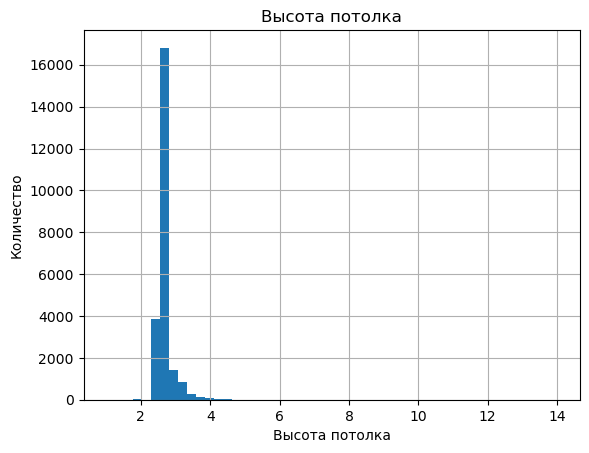

In [99]:
data['ceiling_height'].plot(kind='hist', bins=50, title='Высота потолка', grid=True)
plt.ylabel('Количество')
plt.xlabel('Высота потолка')

<Axes: >

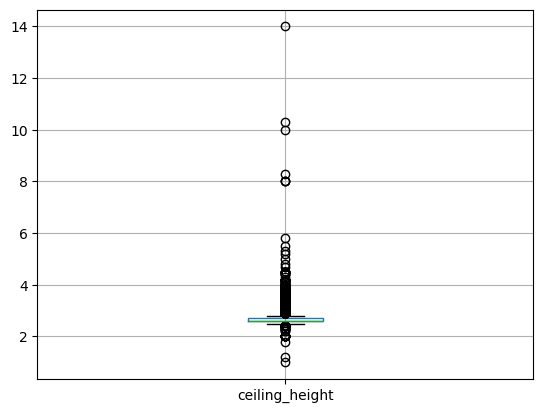

In [100]:
data.boxplot('ceiling_height')

Остались выбросы. Исследуем их количество.

In [101]:
display(data.query('ceiling_height<=2 or ceiling_height>=5'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,week_day,month,year,categorize_floor,city_centers_km
464,15,66571000.0,280.30,2015-06-11,6,5.2,8,159.500000,7,False,...,187.0,1,616.0,578.0,237499.11,3,6,2015,другой,7.0
552,11,2999000.0,33.50,2017-03-30,1,2.0,15,17.500000,6,False,...,520.0,1,949.0,270.0,89522.39,3,3,2017,другой,12.0
1053,13,550000.0,29.00,2018-02-01,1,5.0,3,16.467937,1,False,...,NaN,0,NaN,6.0,18965.52,3,2,2018,первый,NaN
2572,4,2400000.0,62.00,2018-12-27,3,2.0,5,40.000000,4,False,...,NaN,0,NaN,NaN,38709.68,3,12,2018,другой,NaN
3474,3,1400000.0,30.00,2018-03-16,1,8.0,5,15.300000,2,False,...,NaN,0,NaN,125.0,46666.67,4,3,2018,другой,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.0,18,16.600000,9,False,...,NaN,0,NaN,36.0,59836.30,0,12,2017,другой,NaN
5712,5,1500000.0,42.80,2017-08-14,2,1.2,2,27.500000,1,False,...,NaN,0,NaN,248.0,35046.73,0,8,2017,первый,NaN
5850,9,1650000.0,35.50,2018-05-29,1,2.0,5,20.159026,5,False,...,NaN,0,NaN,100.0,46478.87,1,5,2018,последний,NaN
5863,20,5650000.0,45.00,2018-08-15,1,8.3,16,19.300000,14,False,...,NaN,1,613.0,14.0,125555.56,2,8,2018,другой,11.0
7578,17,38000000.0,143.00,2017-11-02,3,5.5,5,83.000000,5,False,...,479.0,0,NaN,NaN,265734.27,3,11,2017,последний,6.0


Количество маленькое, поэтому избавимся от этих значений

Text(0.5, 0, 'Высота потолка')

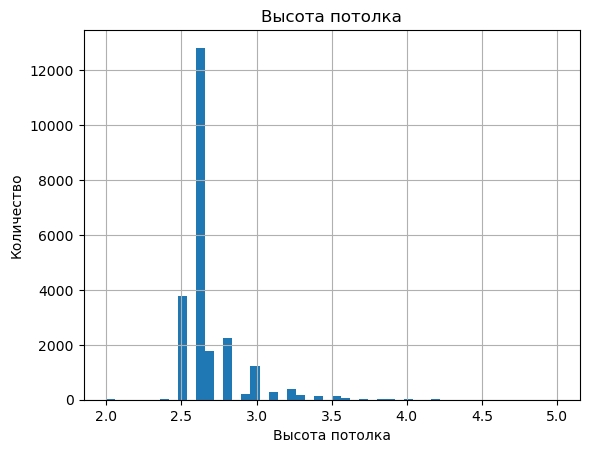

In [102]:
data['ceiling_height'].plot(kind='hist', bins=50, range=(2,5), title='Высота потолка', grid=True)
plt.ylabel('Количество')
plt.xlabel('Высота потолка')

In [103]:
data = data.query('2 < ceiling_height < 5')

<Axes: >

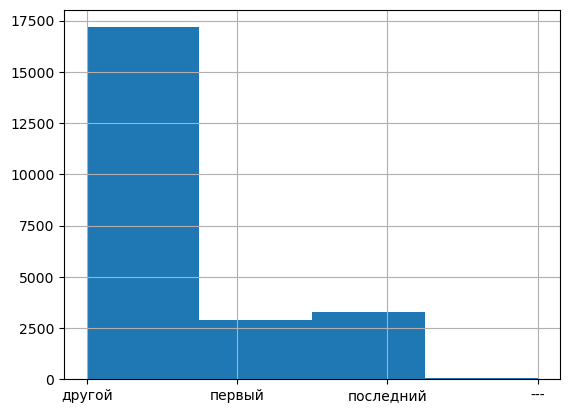

In [104]:
data['categorize_floor'].hist(bins=4)

Видим, что основная доля объявлений на квартиры, которые не на крайних этажах.

Text(0.5, 0, 'Всего этажей')

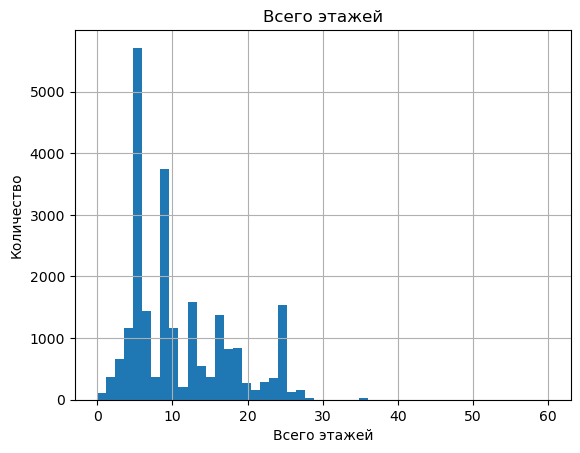

In [105]:
data['floors_total'].plot(kind='hist', bins=50, title='Всего этажей', grid=True)
plt.ylabel('Количество')
plt.xlabel('Всего этажей')

<Axes: >

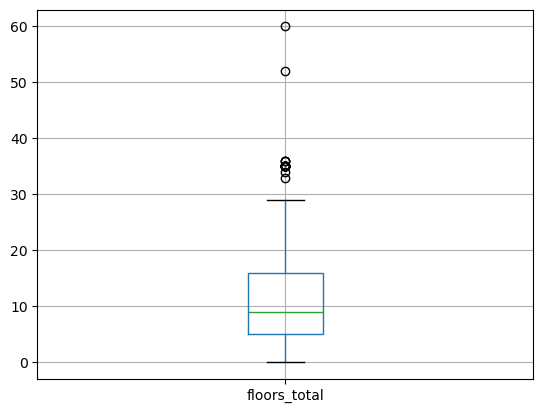

In [106]:
data.boxplot('floors_total')

In [107]:
display(data.query('floors_total==0 or floors_total>=30'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,week_day,month,year,categorize_floor,city_centers_km
186,12,11640000.0,65.2,2018-10-02,2,2.6,0,30.80,4,False,...,123.0,0,NaN,49.0,178527.61,1,10,2018,---,12.0
237,4,2438033.0,28.1,2016-11-23,1,2.6,0,20.75,1,False,...,NaN,1,374.0,251.0,86762.74,2,11,2016,первый,17.0
397,15,5990000.0,54.0,2018-03-22,2,2.6,36,21.40,28,False,...,NaN,3,80.0,11.0,110925.93,3,3,2018,другой,20.0
457,4,9788348.0,70.8,2015-08-01,2,2.6,0,38.40,12,False,...,309.0,2,706.0,727.0,138253.50,5,8,2015,---,8.0
671,4,6051191.0,93.6,2017-04-06,3,2.6,0,47.10,8,False,...,NaN,1,374.0,123.0,64649.48,3,4,2017,---,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22656,4,4574160.0,64.5,2017-04-02,2,2.6,0,31.70,20,False,...,NaN,1,374.0,127.0,70917.21,6,4,2017,---,17.0
22808,0,14569263.0,110.4,2016-11-20,3,2.6,0,45.38,6,False,...,NaN,0,NaN,260.0,131967.96,6,11,2016,---,5.0
22946,14,7690000.0,75.0,2018-03-27,2,2.6,35,40.00,8,False,...,NaN,3,80.0,NaN,102533.33,1,3,2018,другой,20.0
23590,0,21187872.0,123.3,2017-04-25,3,2.6,0,50.40,18,False,...,NaN,0,NaN,104.0,171840.00,1,4,2017,---,5.0


В СпБ самый высокий дом 37 этажей. Избавимся от аномальных значений ('этажи'>30). А также от тех данных, где не указан этаж, т.к. их меньше 1%

In [108]:
data = data.query('0<floors_total<30')

Text(0.5, 0, 'Всего этажей')

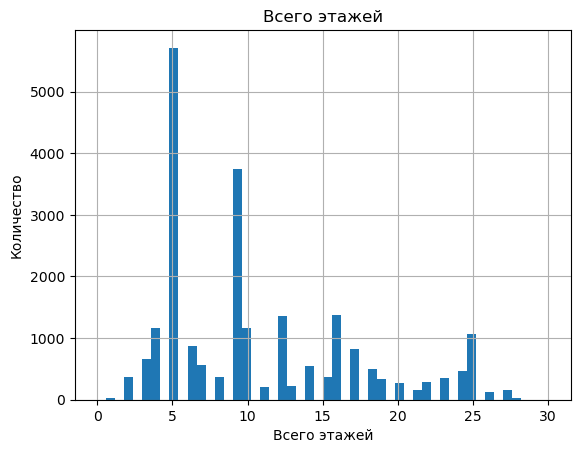

In [109]:
data['floors_total'].plot(kind='hist', bins=50, range=(0,30), title='Всего этажей', grid=True)
plt.ylabel('Количество')
plt.xlabel('Всего этажей')

Text(0.5, 0, 'Расстояние до центра города')

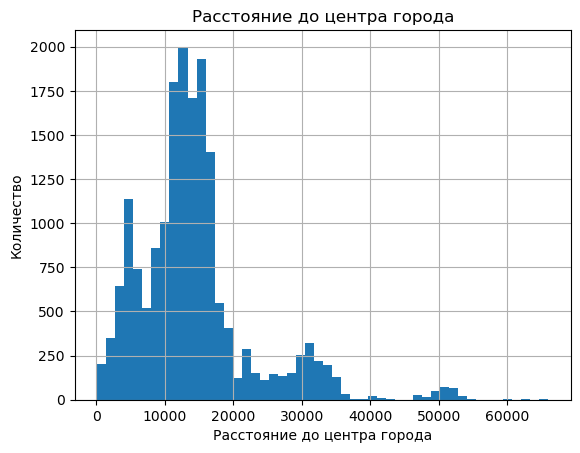

In [110]:
data['city_centers_nearest'].plot(kind='hist', bins=50, title='Расстояние до центра города', grid=True)
plt.ylabel('Количество')
plt.xlabel('Расстояние до центра города')

In [111]:
data['city_centers_nearest'].describe()

count    17809.000000
mean     14263.242069
std       8603.865441
min        181.000000
25%       9403.000000
50%      13142.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Из имеющихся данных видим, большая часть квартир находится на расстоянии 10-16 км от центра города.

Text(0.5, 0, 'Расстояние до парка')

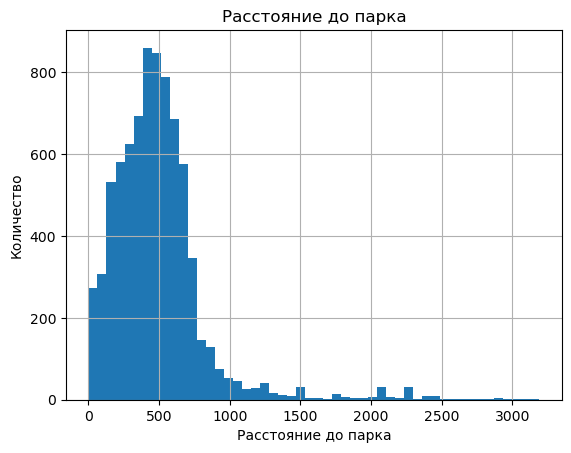

In [112]:
data['parks_nearest'].plot(kind='hist', bins=50, title='Расстояние до парка', grid=True)
plt.ylabel('Количество')
plt.xlabel('Расстояние до парка')

In [113]:
data['parks_nearest'].describe()

count    7872.000000
mean      491.327744
std       342.266014
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Мы отбросили значения общей площади, большие 500 кв.м, т.к. их было малое количество и эти аномальные значения будут сильно влиять на средние и медианные значения. Наибольшее значение общей площади 900 кв.м, а медианное 52. Также отбросили значения жилой площади, меньшие 10 кв.м (таких квартир нет) и большие 200 кв.м (чтобы не влияли на расчеты). Наибольшее значение жилой площади 347 кв.м, а медианное 30.
Кухня размером, меньше 2 кв.м - это аномальное значение, избавились от них и кухня, больше 50 кв.м - небольшое количество, отбросили эти строки для дальнейшего исследования. Самое большое значение 107 кв.м.
Цену за квартиру оставили меньше 100 млн.руб., остальные значения сильно влияют на расчет средних показателей, т.к. являются выбросами.
Количество комнат оставили меньше 7, т.к. больших значений осталось единицы. Самые распространенные - это 2-х, 3-х комнатные квартиры.
Значения высоты потолка, которые выше 20 м уменьшили в 10 раз, т.к. вероятнее всего значение в 25 м подразумевает под собой высоту в 2,5 м , 32 м - это 3,2 м, а также значения округлили до десятых долей. Еще удалили значения высоты, меньшие 2 м, т.к. таких значений не может быть и большие 5 м, т.к. их небольшое количество.
Исследуя категории квартир, видим, что наибольшей популярностью пользуются квартиры не на крайних этажах.
В СпБ самый высокий дом 37 этажей. Избавимся от аномальных значений ('этажи'>30). А также от тех данных, где не указан этаж, т.к. их меньше 1%. Самые популярные дома - это 5, 9-этажки.
Из имеющихся данных видим, большая часть квартир находится на расстоянии 10-16 км от центра города.
Анализировать данные по "расстоянию до ближайшего парка" не стоит, т.к. больше половины значений пропущенны. Стоит запросить эти данные еще раз. А также еще раз уточнить данные до центра города, расстояние до ближайшего аэропорта, количество парков и водоемов в окрестности, т.к. они были получены на основе картографических данных.  

#### Исследуем как быстро продавались квартиры

Text(0.5, 0, 'Срок размещения объявления')

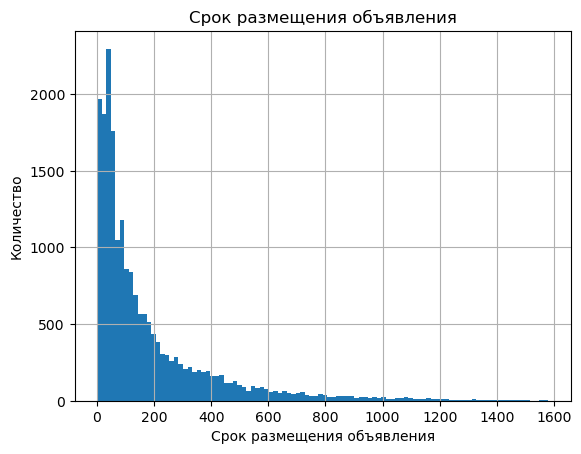

In [114]:
data['days_exposition'].plot(kind='hist', bins=100, title='Срок размещения объявления', grid=True)
plt.ylabel('Количество')
plt.xlabel('Срок размещения объявления')

In [115]:
display(data.query('days_exposition!=0')['days_exposition'].describe())

count    20179.000000
mean       180.166312
std        219.319944
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 0, 'Срок размещения объявления')

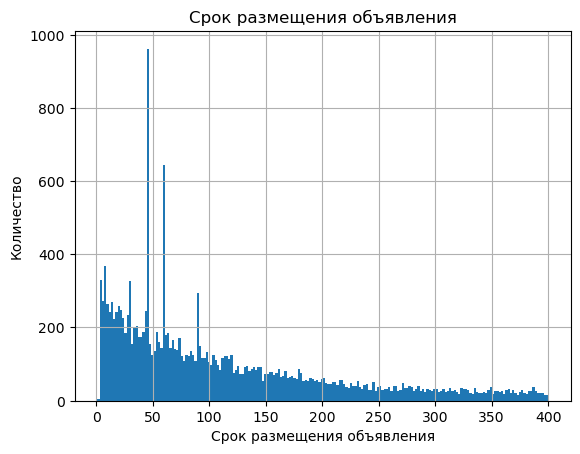

In [116]:
data['days_exposition'].plot(kind='hist', bins=200, range=(1,400), title='Срок размещения объявления', grid=True)
plt.ylabel('Количество')
plt.xlabel('Срок размещения объявления')

Возможно, если значение 'days_exposition' не указано (мы заполнили их "0"), то квартира еще не продана. И эти данные нам учитывать не стоит. Самая быстрая продажа - 1 день, самая долгая 1572 дня (более 4-х лет). Среднее значение сколько дней было опубликовано объявление до продажи квартиры - 181 день (полгода), медианное значение - 95 (квартал). До 43 дней продажи можно считать быстрыми (Q1), после 231 дней - необычно долгими (Q3).

#### Исследуем влияние разных факторов на общую стоимость объекта

Text(0.5, 0, 'Общая площадь')

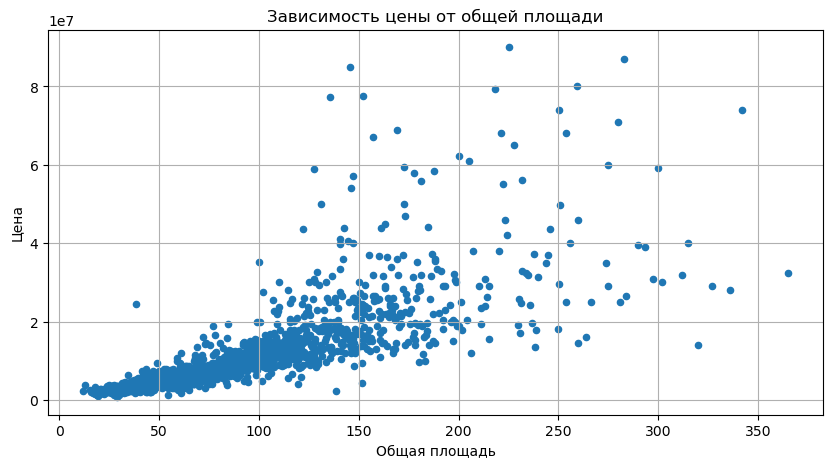

In [117]:
data_pivot_total_area = data.pivot_table(index='total_area',  values='last_price', aggfunc='median')
data_pivot_total_area = data_pivot_total_area.reset_index()
(data_pivot_total_area.plot(x='total_area', y='last_price', kind='scatter', grid=True, 
                            figsize=(10, 5), title='Зависимость цены от общей площади'))
plt.ylabel('Цена')
plt.xlabel('Общая площадь')

In [118]:
data['last_price'].corr(data['total_area']).round(2)

0.75

Мы видим, что с увеличением площади, цена повышается.

Text(0.5, 0, 'Жилая площадь')

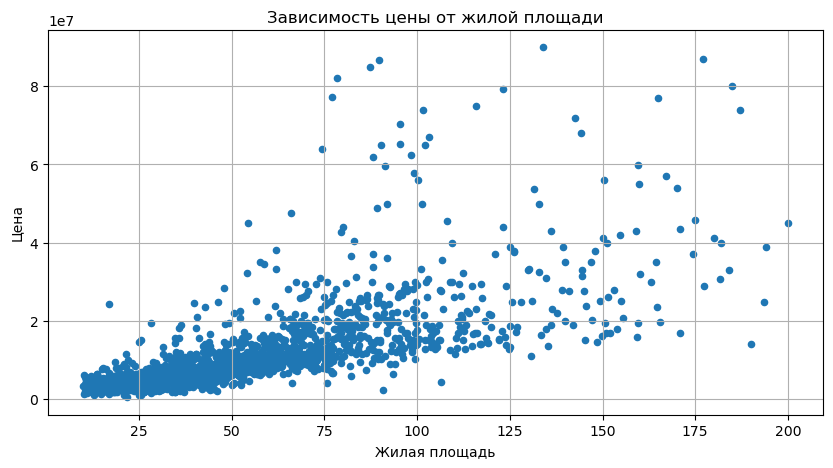

In [119]:
data_pivot_living_area = data.pivot_table(index='living_area',  values='last_price', aggfunc='median')
data_pivot_living_area = data_pivot_living_area.reset_index()
(data_pivot_living_area.plot(x='living_area', y='last_price', kind='scatter', grid=True, 
                             figsize=(10, 5), title='Зависимость цены от жилой площади'))
plt.ylabel('Цена')
plt.xlabel('Жилая площадь')

In [120]:
data['last_price'].corr(data['living_area']).round(2)

0.67

Общая цена квартиры зависит от жилой площади, т.е. чем больше жилая площадь, тем выше стоимость.

Text(0.5, 0, 'Площадь кухни')

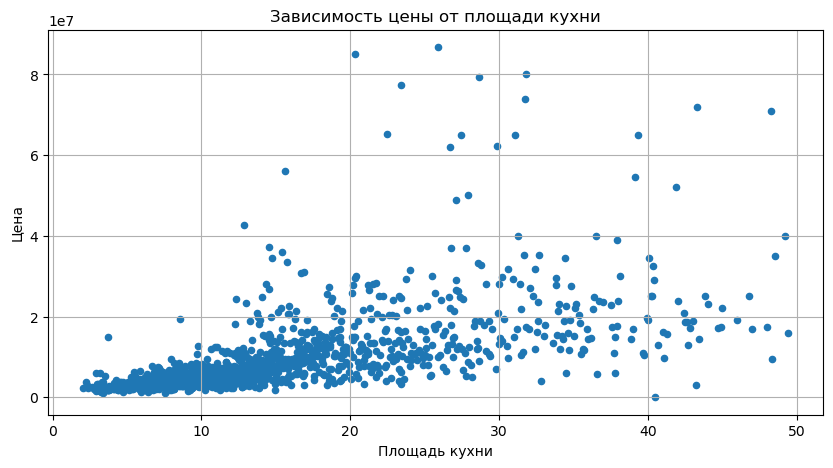

In [121]:
data_pivot_kitchen_area = data.pivot_table(index='kitchen_area',  values='last_price', aggfunc='median')
data_pivot_kitchen_area = data_pivot_kitchen_area.reset_index()
(data_pivot_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, 
                              figsize=(10, 5), title='Зависимость цены от площади кухни'))
plt.ylabel('Цена')
plt.xlabel('Площадь кухни')

In [122]:
data['last_price'].corr(data['kitchen_area']).round(2)

0.57

С увеличением площади кухни, цена квартиры растет.

Text(0.5, 0, 'Количество комнат')

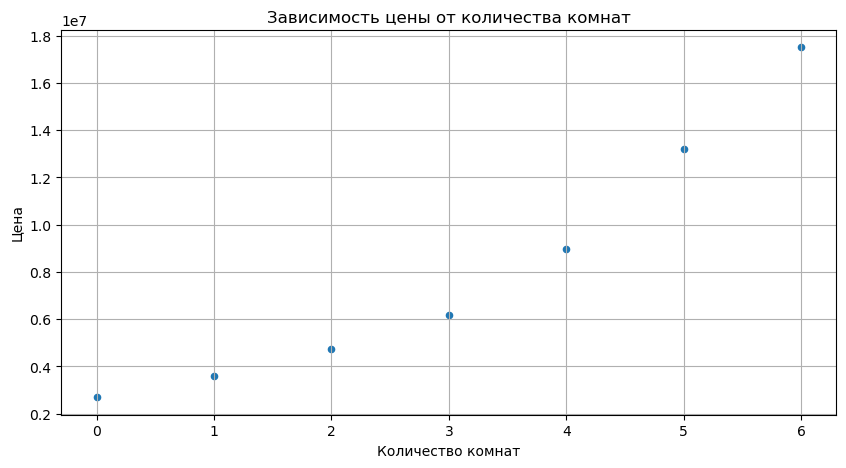

In [123]:
data_pivot_rooms = data.pivot_table(index='rooms',  values='last_price', aggfunc='median')
data_pivot_rooms = data_pivot_rooms.reset_index()
(data_pivot_rooms.plot(x='rooms', y='last_price', kind='scatter', grid=True, 
                       figsize=(10, 5), title='Зависимость цены от количества комнат'))
plt.ylabel('Цена')
plt.xlabel('Количество комнат')

In [124]:
data['last_price'].corr(data['rooms']).round(2)

0.45

Зависимость цены от количества комнат обнаружена.

Text(0.5, 0, 'Категория этажа')

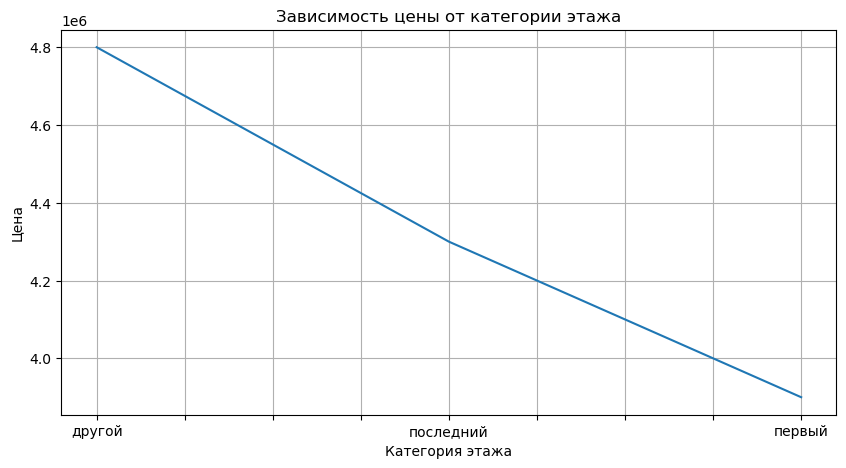

In [125]:
(
data.pivot_table(index = 'categorize_floor', values = 'last_price', aggfunc= 'median')
    .sort_values(by='last_price', ascending=False).plot(y='last_price', kind='line', figsize=(10, 5), legend=False, 
                                                        grid=True, title='Зависимость цены от категории этажа')
)
plt.ylabel('Цена')
plt.xlabel('Категория этажа')

Итоговая стоимость зависит от этажа. Самая низкая цена на первом этаже. А самая высокая - не на крайних этажах.

Text(0.5, 0, 'День недели')

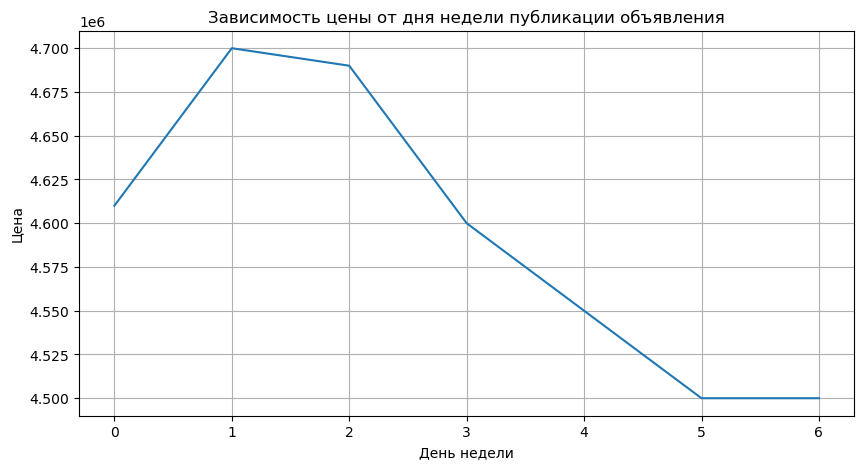

In [126]:
data_pivot_week_day = data.pivot_table(index='week_day',  values='last_price', aggfunc= 'median')
data_pivot_week_day.plot(style='-', figsize=(10,5), grid=True, legend=False,
                         title='Зависимость цены от дня недели публикации объявления')
plt.ylabel('Цена')
plt.xlabel('День недели')


Самая низкая цена наблюдается у объявлений, опубликованых в воскресенье, а самая высокая в среду и четверг.

Text(0.5, 0, 'Месяц')

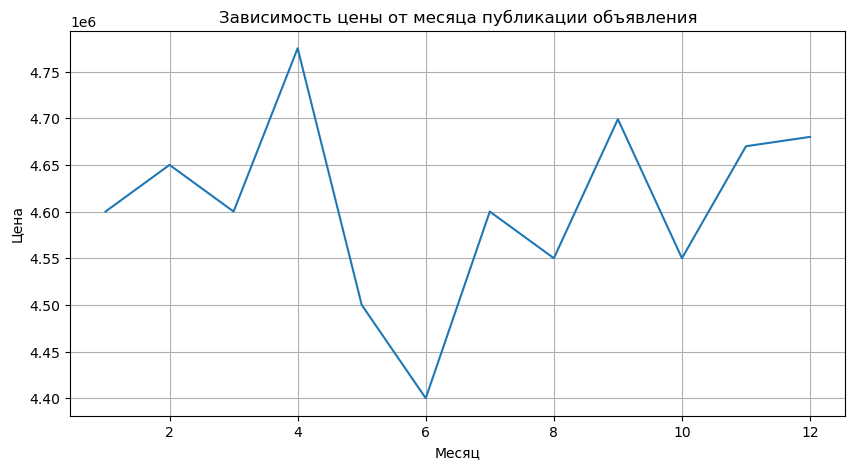

In [127]:
data_pivot_month = data.pivot_table(index='month',  values='last_price', aggfunc= 'median')
data_pivot_month.plot(style='-', figsize=(10,5), grid=True, legend=False, 
                      title='Зависимость цены от месяца публикации объявления')
plt.ylabel('Цена')
plt.xlabel('Месяц')

Самая низкая цена цена за 1 кв.м наблюдается у объявлений, опубликованых в июне и октябре, а самая высокая - в декабре.

Text(0.5, 0, 'Год')

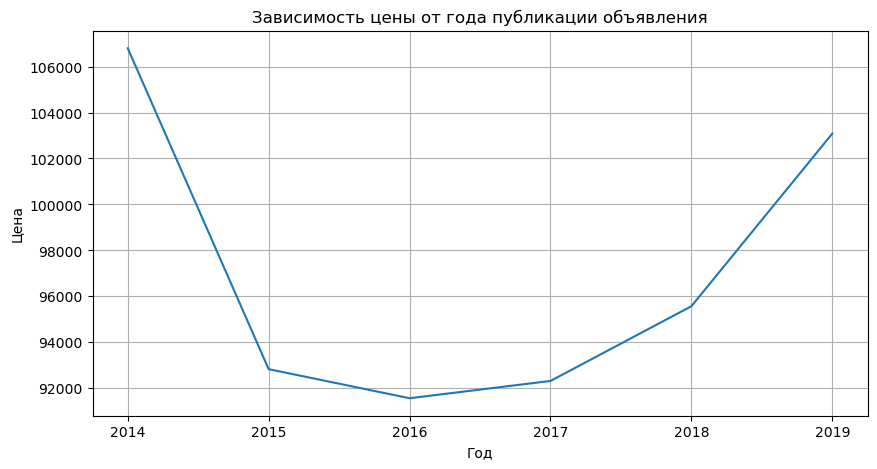

In [128]:
data_pivot_year = data.pivot_table(index='year',  values='price_one_metr', aggfunc= 'median')
data_pivot_year.plot(style='-', figsize=(10,5), grid=True, legend=False, title='Зависимость цены от года публикации объявления')
plt.ylabel('Цена')
plt.xlabel('Год')

Самая высокая цена за 1 кв.м была в 2014 г. Затем наступил кризис и цены значительно упали. Минимум наблюдается в 2015-2017 гг. Затем цены пошли на увеличение.

#### Исследуем цену одного кв.метра в 10 населенных пунктах с наибольшим количеством объявлений

In [129]:
data_final = data.pivot_table(index='locality_name', values= 'price_one_metr', aggfunc=('count', 'mean'))
data_final.columns = ['Кол-во объявлений', 'Ср.цена за 1 кв.м']
data_final['Ср.цена за 1 кв.м'] = data_final['Ср.цена за 1 кв.м'].round().astype('int')
data_final = data_final.sort_values(by='Кол-во объявлений', ascending=False)
data_final = data_final[0:10]
display(data_final)
print('Населенный пункт с самой высокой стоимостью кв.м:', data_final.loc[data_final['Кол-во объявлений']==data_final['Кол-во объявлений'].max(), 'Кол-во объявлений'].idxmax())
print('Населенный пункт с самой низкой стоимостью кв.м:', data_final.loc[data_final['Кол-во объявлений']==data_final['Кол-во объявлений'].min(), 'Кол-во объявлений'].idxmax())


,Кол-во объявлений,Ср.цена за 1 кв.м
locality_name,,
Санкт-Петербург,15404,113156
Мурино,584,86015
Кудрово,469,95262
поселок Шушары,438,78577
Всеволожск,397,68719
Пушкин,364,102930
Колпино,337,75333
поселок Парголово,326,90332
Гатчина,307,68746


Населенный пункт с самой высокой стоимостью кв.м: Санкт-Петербург
Населенный пункт с самой низкой стоимостью кв.м: Выборг


Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идут районы с хорошей застройкой и большим количеством парков, достопримечательностей. Из топ-10 наименьшая стоимость в Выборге, из которого далеко ехать до Санкт-Петербурга.

#### Исследуем  зависит ли цена квартиры в Санкт-Петербурге от расстояния до центра города

In [130]:
data_spb = data.query('locality_name=="Санкт-Петербург"')

In [131]:
display(data_spb)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,week_day,month,year,categorize_floor,city_centers_km
0,20,13000000.0,108.00,2019-03-07,3,2.7,16,51.000000,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
2,10,5196000.0,56.00,2015-08-20,2,2.6,5,34.300000,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.6,14,90.289724,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.0,14,32.000000,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
7,5,7915000.0,71.60,2019-04-18,2,2.6,24,40.658769,22,False,...,NaN,0,NaN,NaN,110544.69,3,4,2019,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.9,15,16.300000,4,False,...,353.0,2,652.0,29.0,100566.57,2,2,2018,другой,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.6,5,31.000000,2,False,...,300.0,0,NaN,15.0,105769.23,3,7,2018,другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.8,25,40.300000,7,False,...,NaN,1,806.0,519.0,129903.98,3,10,2016,другой,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.7,5,73.300000,3,False,...,796.0,3,381.0,NaN,72490.85,1,3,2017,другой,4.0


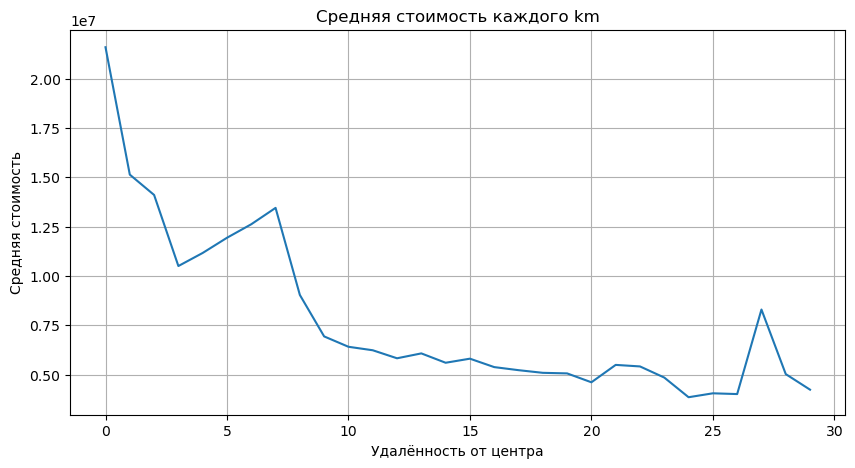

In [132]:
data_spb_price = data_spb.groupby('city_centers_km', as_index = False).agg({'last_price' : 'mean'})
(
data_spb_price.plot(x='city_centers_km', y='last_price', 
                    grid=True, figsize=(10, 5), title='Средняя стоимость каждого km', legend=False)
)
plt.ylabel('Средняя стоимость')
plt.xlabel('Удалённость от центра')
plt.show()

Как и ожидалось, мы видим, что самая высокая стоимость квартир в центре города и с удалением от центра города, цена падает. 

### Общий вывод

Мы обработали полученные данные:
- обработали пропущенные значения там, где это необходимо
- обработали аномальные значения
- обработали дубликаты в названиях населенных пунктов
- заменили типы данных на удобные для работы
- удалили те строки с пропущенными значениями, которые практически не должны влиять на результат исследования
- посчитали и добавили в таблицу цену квадратного метра жилья
- добавили день недели, месяц и год  публикации объявления
- добавили классификацию этажей
- добавили расстояние до центра города в км

Увидели, что:
- самые популярные это одно- и двух- комнатные квартиры и занимают 32,6% и 32.87% соответственно
- Квартиры с 0 и 6 комнатами занимают менее 1% от общего количества объявлений
Если выделить 3 самых популярных видов квартир, то в него войдут: одно-, двух- и трехкомнатные квартиры.

Для анализа данных мы отбросили значения:
- общей площади, большие 500 кв.м
- жилой площади, меньшие 10 кв.м и большие 200 кв.м
- площадь кухни, меньше 2 кв.м и больше 50 кв.м
- стоимости квартиры больше 100 млн.руб
- количество комнат больше 6
- значения высоты потолка меньше 2м и больше 5 м
- количество этажей, больше 30.
т.к. этих значений либо малое количество, либо они являются аномальными значениями.

Срок продажи квартиры

Чаще всего квартиру продают за 95 (квартал) дней. До 43 дней продажи можно считать быстрыми (Q1), после 231 дней - необычно долгими (Q3). Самая быстрая продажа - 1 день, самая долгая 1572 дня (более 4-х лет). Среднее значение сколько дней было опубликовано объявление до продажи квартиры - 181 день (полгода)

Факторы, влияющие на стоимость

Общая и жилая площади больше всего влияют на стоимость квартир. В меньшей степени влияют плщадь кухни и количество комнат. 
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

Самая низкая цена наблюдается у объявлений, опубликованых в воскресенье, а самая высокая в среду и четверг. Видимо это связано с активностью людей в рабочие дни.

Самая низкая цена цена за 1 кв.м наблюдается у объявлений, опубликованых в июне и октябре, а самая высокая - в декабре.

Самая высокая цена за 1 кв.м была в 2014 г. Затем наступил кризис и цены значительно упали. Минимум наблюдается в 2015-2017 гг. Затем экономическая ситуация в стране стабилизировалась и цены пошли на увеличение.

Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идут районы с хорошей застройкой и большим количеством парков, достопримечательностей. Из топ-10 наименьшая стоимость в Выборге, из которого далеко ехать до Санкт-Петербурга.

Стоимость недвижимости зависит от расстояния до центра города. Обычно, чем ближе к центру, тем выше цена за кв.м. Это связано с тем, что в центре находятся все удобства, культурные центры, зоны отдыха, места встреч и т.п. Также в центре располагаются офисы крупных компаний. Дальше от центра, обычно, располагаются спальные районы, которые не так привлекательны для развлечения, туризма. Это сказывается на цене за жилье. Также, чем дальше от центра, тем больше шанс, что жилье может граничить с промышленными районами.
